## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 70us/step - loss: 2.2925 - acc: 0.1398 - val_loss: 2.2438 - val_acc: 0.1775
Epoch 2/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.2183 - acc: 0.2026 - val_loss: 2.1929 - val_acc: 0.2246
Epoch 3/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.1721 - acc: 0.2368 - val_loss: 2.1511 - val_acc: 0.2522
Epoch 4/500
50000/50000 [==============================] - 2s 48us/step - loss: 2.1328 - acc: 0.2563 - val_loss: 2.1142 - val_acc: 0.2664
Epoch 5/500
50000/50000 [==============================] - 2s 47us/step - loss: 2.0979 - acc: 0.2695 - val_loss: 2.0810 - val_acc: 0.2747
Epoch 6/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.0664 - acc: 0.2815 - val_loss: 2.0507 - val_acc: 0.2880
Epoch 7/500
50000/50000 [==

Epoch 56/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6813 - acc: 0.4165 - val_loss: 1.6834 - val_acc: 0.4137
Epoch 57/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6780 - acc: 0.4177 - val_loss: 1.6823 - val_acc: 0.4144
Epoch 58/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6748 - acc: 0.4176 - val_loss: 1.6772 - val_acc: 0.4175
Epoch 59/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6716 - acc: 0.4184 - val_loss: 1.6759 - val_acc: 0.4171
Epoch 60/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6685 - acc: 0.4205 - val_loss: 1.6727 - val_acc: 0.4165
Epoch 61/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6654 - acc: 0.4210 - val_loss: 1.6698 - val_acc: 0.4173
Epoch 62/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6626 - acc: 0.4235 - val_loss: 1.6684 - val_acc: 0.4219
Epoch 63/500
50000/50000 [=

Epoch 115/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5331 - acc: 0.4674 - val_loss: 1.5558 - val_acc: 0.4554
Epoch 116/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5309 - acc: 0.4694 - val_loss: 1.5555 - val_acc: 0.4562
Epoch 117/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5291 - acc: 0.4694 - val_loss: 1.5503 - val_acc: 0.4585
Epoch 118/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5272 - acc: 0.4698 - val_loss: 1.5503 - val_acc: 0.4564
Epoch 119/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5250 - acc: 0.4700 - val_loss: 1.5467 - val_acc: 0.4600
Epoch 120/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5233 - acc: 0.4716 - val_loss: 1.5463 - val_acc: 0.4593
Epoch 121/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5213 - acc: 0.4732 - val_loss: 1.5520 - val_acc: 0.4579
Epoch 122/500
50000/

50000/50000 [==============================] - 2s 46us/step - loss: 1.4328 - acc: 0.5013 - val_loss: 1.4846 - val_acc: 0.4709
Epoch 174/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4312 - acc: 0.5020 - val_loss: 1.4924 - val_acc: 0.4725
Epoch 175/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4299 - acc: 0.5036 - val_loss: 1.4831 - val_acc: 0.4756
Epoch 176/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4282 - acc: 0.5033 - val_loss: 1.4747 - val_acc: 0.4760
Epoch 177/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4264 - acc: 0.5042 - val_loss: 1.4829 - val_acc: 0.4807
Epoch 178/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4254 - acc: 0.5051 - val_loss: 1.4787 - val_acc: 0.4754
Epoch 179/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4238 - acc: 0.5055 - val_loss: 1.4718 - val_acc: 0.4788
Epoch 180/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 1.3508 - acc: 0.5298 - val_loss: 1.4301 - val_acc: 0.4974
Epoch 232/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3488 - acc: 0.5320 - val_loss: 1.4351 - val_acc: 0.4883
Epoch 233/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3481 - acc: 0.5317 - val_loss: 1.4385 - val_acc: 0.4904
Epoch 234/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3464 - acc: 0.5312 - val_loss: 1.4465 - val_acc: 0.4884
Epoch 235/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3452 - acc: 0.5315 - val_loss: 1.4246 - val_acc: 0.4948
Epoch 236/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3436 - acc: 0.5332 - val_loss: 1.4269 - val_acc: 0.4926
Epoch 237/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3424 - acc: 0.5323 - val_loss: 1.4228 - val_acc: 0.4969
Epoch 238/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.2786 - acc: 0.5539 - val_loss: 1.3886 - val_acc: 0.5072
Epoch 290/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.2774 - acc: 0.5552 - val_loss: 1.3891 - val_acc: 0.5089
Epoch 291/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2765 - acc: 0.5554 - val_loss: 1.3920 - val_acc: 0.5104
Epoch 292/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2751 - acc: 0.5551 - val_loss: 1.3933 - val_acc: 0.5067
Epoch 293/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2740 - acc: 0.5553 - val_loss: 1.4064 - val_acc: 0.4992
Epoch 294/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2733 - acc: 0.5550 - val_loss: 1.3878 - val_acc: 0.5091
Epoch 295/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2712 - acc: 0.5577 - val_loss: 1.3872 - val_acc: 0.5074
Epoch 296/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.2133 - acc: 0.5763 - val_loss: 1.3666 - val_acc: 0.5146
Epoch 348/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2116 - acc: 0.5774 - val_loss: 1.3808 - val_acc: 0.5167
Epoch 349/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2108 - acc: 0.5795 - val_loss: 1.3971 - val_acc: 0.5091
Epoch 350/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2102 - acc: 0.5772 - val_loss: 1.3691 - val_acc: 0.5078
Epoch 351/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2085 - acc: 0.5786 - val_loss: 1.3704 - val_acc: 0.5100
Epoch 352/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2088 - acc: 0.5775 - val_loss: 1.3698 - val_acc: 0.5136
Epoch 353/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2071 - acc: 0.5793 - val_loss: 1.3767 - val_acc: 0.5151
Epoch 354/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.1510 - acc: 0.5984 - val_loss: 1.3697 - val_acc: 0.5137
Epoch 406/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1508 - acc: 0.5995 - val_loss: 1.3507 - val_acc: 0.5235
Epoch 407/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1488 - acc: 0.6000 - val_loss: 1.3837 - val_acc: 0.5131
Epoch 408/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1492 - acc: 0.5982 - val_loss: 1.3651 - val_acc: 0.5139
Epoch 409/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1481 - acc: 0.6000 - val_loss: 1.3529 - val_acc: 0.5195
Epoch 410/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1462 - acc: 0.5993 - val_loss: 1.3465 - val_acc: 0.5192
Epoch 411/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1447 - acc: 0.6008 - val_loss: 1.3516 - val_acc: 0.5157
Epoch 412/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.0932 - acc: 0.6179 - val_loss: 1.3471 - val_acc: 0.5230
Epoch 464/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0921 - acc: 0.6205 - val_loss: 1.3470 - val_acc: 0.5215
Epoch 465/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0905 - acc: 0.6184 - val_loss: 1.3358 - val_acc: 0.5266
Epoch 466/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0899 - acc: 0.6198 - val_loss: 1.3520 - val_acc: 0.5243
Epoch 467/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0868 - acc: 0.6202 - val_loss: 1.3302 - val_acc: 0.5313
Epoch 468/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0880 - acc: 0.6205 - val_loss: 1.3998 - val_acc: 0.5111
Epoch 469/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0866 - acc: 0.6197 - val_loss: 1.3569 - val_acc: 0.5223
Epoch 470/500
50000/50000 [=======

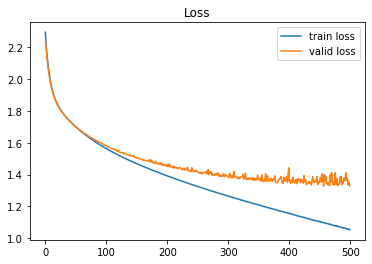

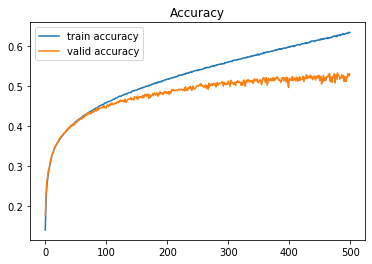

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()